# Проект: Предсказание стартапов

**Цели и задачи проекта по предсказанию статуса стартапов**. 

***Цели проекта:*** 

Главная цель проекта заключается в разработке модели машинного обучения, способной предсказать статус стартапа (либо "operating" — продолжающий действовать, либо "closed" — закрывшийся) на основе доступных данных. Проект направлен на эффективность и точность предсказаний, а также на понимание факторов, влияющих на успех стартапа.

***Задачи проекта:***

1. Загрузка и ознакомление с данными:  
- Загрузить тренировочный и тестовый наборы данных.  
- Оценить структуру данных, типы признаков и наличие пропусков или аномалий.  
2. Предварительная обработка данных:  
- Обработать пропуски, если таковые имеются.  
- Преобразовать категориальные признаки в числовые (например, с помощью one-hot кодирования).  
- Нормализовать или стандартизировать числовые признаки, если это необходимо.  
3. Полноценный разведочный анализ данных (EDA):  
- Провести исследование распределения целевой переменной и признаков.  
- Исследовать корреляции между признаками и целевой переменной.  
- Визуализировать основные находки для лучшего понимания данных.  
4. Разработка новых синтетических признаков:  
- На основе имеющихся характеристик сгенерировать новые признаки, которые могут повысить качество модели.  
- Оценить их значимость.  
5. Проверка на мультиколлинеарность:  
- Оценить, существуют ли линейные отношения между признаками, которые могут негативно отразиться на модели.  
- Удалить или модифицировать признаки с высокой мультиколлинеарностью.  
6. Отбор финального набора обучающих признаков:  
- Учитывая предварительный анализ, отобрать наиболее значимые признаки для обучения модели.
- Применить методы отбора признаков, такие как Lasso, Random Forest или SelectKBest.
7. Выбор и обучение моделей:  
- Рассмотреть несколько моделей машинного обучения.  
- Обучить модели на тренировочном наборе данных и провести оценку их производительности.
8. Итоговая оценка качества предсказания лучшей модели:  
- Оценить качество предсказаний с использованием метрик, таких как точность (accuracy), полнота (recall), F1-мера и ROC AUC.  
9. Анализ важности признаков:  
- Проанализировать важность признаков для выбранной модели для получения дополнительных выводов о факторах, влияющих на закрытие стартапов.  
10. Подготовка отчета по исследованию:  
- Составить итоговый отчет, который включает описание проведенного анализа, результаты предсказаний, интерпретацию модели и рекомендации.  

***План проекта:***  
Этап 1:   
Загрузка данных и предварительная обработка.
Объединить данные из всех источников и провести полную проверку на качество данных.  
Этап 2:   
Разведочный анализ данных.  
Провести визуализации, статистический анализ и выделение ключевых наблюдений.  
Этап 3:   
Обработка признаков.  
Создать новые признаки и адаптировать существующие, проверив их на мультиколлинеарность.  
Этап 4:
Обучение моделей.  
Выбрать лучшие модели, провести кросс-валидацию и подобрать гиперпараметры.  
Этап 5: 
Оценка и интерпретация моделей.  
Оценить каждую модель и провести анализ важности признаков.  
Этап 6:  
Подготовка и представление отчетов.    
Подготовить финальный отчет, включающий все результаты анализа, графики и рекомендации для заинтересованных сторон.  

***Вывод:***

Проект направлен на применение методов машинного обучения для анализа и прогнозирования статуса стартапов, что может оказаться полезным для инвесторов и основателей стартапов в принятии обоснованных решений. Каждый этап проекта будет тщательно проработан, чтобы обеспечить высокое качество анализируемой информации и точность предсказаний.

## Этап 1

### Загрузка данных и предварительная обработка.

**Импорт библиотек**

In [2]:
pip --version

pip 23.3.1 from /opt/anaconda3/lib/python3.11/site-packages/pip (python 3.11)
Note: you may need to restart the kernel to use updated packages.


In [3]:
!pip install xgboost

In [4]:
!pip install lightgbm

In [29]:
import requests
import os
import zipfile
from urllib.parse import urlencode
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, FunctionTransformer, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline 
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.preprocessing import FunctionTransformer
import phik
from statsmodels.stats.outliers_influence import variance_inflation_factor

**Скачиваем датасеты**

In [6]:
# Базовый URL для получения ссылки на скачивание
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'

# Публичный ключ (ссылка на файл на Яндекс Диске)
public_key = 'https://disk.yandex.ru/d/S7T7aTJQCKuv4g'

# Формируем конечный URL для запроса ссылки на скачивание
final_url = base_url + urlencode({'public_key': public_key})

# Получаем ссылку на скачивание
response = requests.get(final_url)

# Проверям, что запрос прошёл успешно
if response.ok:
    # Извлекаем URL для скачивания
    download_url = response.json()['href']

    # Скачиваем файл
    download_response = requests.get(download_url)

    # Сохраняем файл
    if download_response.ok:
        with open('data.zip', 'wb') as f:
            f.write(download_response.content)

        # Распаковываем архив
        zip_path = 'data.zip'
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall('extracted_data')

        print("Файл успешно скачан и распакован в папку 'extracted_data'.")
    else:
        print("Ошибка при скачивании файла:", download_response.status_code)
else:
    print("Ошибка при получении ссылки на скачивание:", response.status_code)

Файл успешно скачан и распакован в папку 'extracted_data'.


In [7]:
# Проверяем содержимое папки
extracted_files = os.listdir('extracted_data')
print("Содержимое папки 'extracted_data':", extracted_files)
# Проверяем содержимое папки точно
extracted_files = os.listdir('extracted_data/M1_DS - Startups (STD)')
print("Содержимое папки 'M1_DS - Startups (STD)':", extracted_files)


Содержимое папки 'extracted_data': ['M1_DS - Startups (STD)']
Содержимое папки 'M1_DS - Startups (STD)': ['kaggle_startups_train_28062024.csv', 'kaggle_startups_test_28062024.csv', 'kaggle_startups_sample_submit_28062024.csv']


### Объединить данные из всех источников и провести полную проверку на качество данных.

In [8]:
# Загрузка данных
train_data = pd.read_csv('extracted_data/M1_DS - Startups (STD)/kaggle_startups_train_28062024.csv')
test_data = pd.read_csv('extracted_data/M1_DS - Startups (STD)/kaggle_startups_test_28062024.csv')

# Ознакомление с данными
display(train_data.head())
display(train_data.info())
display(train_data.describe())
print(train_data.isna().sum())
display(test_data.head())
display(test_data.describe())
display(test_data.info())

,name,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,closed_at
0,Lunchgate,Online Reservations|Restaurants,828626.0,operating,CHE,25,Zurich,Zürich,2,2009-10-17,2011-05-01,2014-12-01,NaN
1,EarLens,Manufacturing|Medical|Medical Devices,42935019.0,operating,USA,CA,SF Bay Area,Redwood City,4,2005-01-01,2010-05-04,2014-02-25,NaN
2,Reviva Pharmaceuticals,Biotechnology,35456381.0,operating,USA,CA,SF Bay Area,San Jose,3,2006-01-01,2012-08-20,2014-07-02,NaN
3,Sancilio and Company,Health Care,22250000.0,operating,NaN,NaN,NaN,NaN,3,2004-01-01,2011-09-01,2014-07-18,NaN
4,WireTough Cylinders,Manufacturing,NaN,operating,USA,VA,VA - Other,Bristol,1,2010-05-12,2012-02-01,2012-02-01,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52516 entries, 0 to 52515
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               52515 non-null  object 
 1   category_list      50051 non-null  object 
 2   funding_total_usd  42447 non-null  float64
 3   status             52516 non-null  object 
 4   country_code       47014 non-null  object 
 5   state_code         45753 non-null  object 
 6   region             46157 non-null  object 
 7   city               46157 non-null  object 
 8   funding_rounds     52516 non-null  int64  
 9   founded_at         52516 non-null  object 
 10  first_funding_at   52516 non-null  object 
 11  last_funding_at    52516 non-null  object 
 12  closed_at          4917 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 5.2+ MB


None

,funding_total_usd,funding_rounds
count,4.244700e+04,52516.000000
mean,1.824748e+07,1.740670
std,1.871173e+08,1.374522
min,1.000000e+00,1.000000
25%,3.360275e+05,1.000000
50%,2.000000e+06,1.000000
75%,1.000000e+07,2.000000
max,3.007950e+10,19.000000


name                     1
category_list         2465
funding_total_usd    10069
status                   0
country_code          5502
state_code            6763
region                6359
city                  6359
funding_rounds           0
founded_at               0
first_funding_at         0
last_funding_at          0
closed_at            47599
dtype: int64


,name,category_list,funding_total_usd,country_code,state_code,region,city,funding_rounds,first_funding_at,last_funding_at,lifetime
0,Crystalsol,Clean Technology,2819200.0,NIC,17,NaN,NaN,1,2009-07-01,2009-07-01,3501
1,JBI Fish & Wings,Hospitality,NaN,USA,TN,TN - Other,Humboldt,1,2010-07-28,2010-07-28,2717
2,COINPLUS,Finance,428257.0,LUX,3,Esch-sur-alzette,Esch-sur-alzette,2,2014-05-15,2014-09-18,1295
3,Imagine Communications,Software|Video|Video Streaming,34700000.0,USA,CA,San Diego,San Diego,4,2005-01-01,2010-04-20,4748
4,DNA13,Software,4530000.0,CAN,ON,Ottawa,Ottawa,1,2007-05-08,2007-05-08,6209


,funding_total_usd,funding_rounds,lifetime
count,1.054700e+04,13125.000000,13125.000000
mean,1.654910e+07,1.714438,3097.609524
std,9.217283e+07,1.318800,2128.356554
min,1.000000e+00,1.000000,52.000000
25%,3.200000e+05,1.000000,1726.000000
50%,2.000000e+06,1.000000,2526.000000
75%,1.000000e+07,2.000000,3866.000000
max,4.715000e+09,15.000000,17167.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13125 entries, 0 to 13124
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               13125 non-null  object 
 1   category_list      12534 non-null  object 
 2   funding_total_usd  10547 non-null  float64
 3   country_code       11743 non-null  object 
 4   state_code         11430 non-null  object 
 5   region             11536 non-null  object 
 6   city               11538 non-null  object 
 7   funding_rounds     13125 non-null  int64  
 8   first_funding_at   13125 non-null  object 
 9   last_funding_at    13125 non-null  object 
 10  lifetime           13125 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 1.1+ MB


None

***Вывод*** 

На основе загруженных данных из двух наборов: тренировочного и тестового, можно выделить несколько ключевых моментов и наблюдений. 

<u>Тренировочный набор данных</u>

Тренировочный набор данных состоит из 52,516 записей и 13 столбцов. Каждый из этих столбцов содержит различные типы информации о стартапах:
- name: Название стартапа. Данный столбец имеет 52,515 непустых значений, что свидетельствует о его полноте.
- category_list: Перечень категорий, к которым относится стартап. В этом столбце 2,465 отсутствующих значений, что указывает на необходимость обработки пропусков.
- funding_total_usd: Общая сумма финансирования в долларах. Здесь есть 10,069 пропусков, что делает его необходимо обработать, поскольку пропуски могут повлиять на модель предсказания.
- status: Статус стартапа (например, "operating", "closed" и т.д.). Этот столбец заполнен полностью.
- country_code: Код страны, где зарегистрирован стартап, с 5,502 пропущенными значениями.
- state_code: Код штата, также с 6,763 пропусками.
- region: Регион, где расположен стартап, содержит также 6,359 пропуска.
- city: Город, с 6,359 отсутствующими значениями.
- funding_rounds: Количество раундов финансирования, заполненный полностью.
- founded_at, first_funding_at, last_funding_at: Даты основания, первой и последней финансирования соответственно. Все три столбца заполнены без пропусков.
- closed_at: Дата закрытия стартапа, имеется 47,599 пропусков, что необходимо учитывать при анализе.

Статистический анализ показал, что средняя сумма финансирования составляет примерно 18,247,480, с большим стандартным отклонением (187,117,300), указывая на наличие большого разброса в данных по финансированию. Таким образом, необходимо проявить осторожность при интерпретации средней оценки, так как она может быть искажена аномальными значениями.

<u>Тестовый набор данных</u>

Тестовый набор данных содержит 13,125 записей и 11 столбцов:  

- name: Названия стартапов, все 13,125 значений заполнены.
- category_list: Перечень категорий, 1,591 пропусков; аналогичная проблема, как и в тренировочном наборе.
- funding_total_usd: Сумма финансирования с 7,578 отсутствующими значениями.
- country_code, state_code, region, city: Столбцы географических переменных с аналогичными пропусками.
- funding_rounds: Заполнен полностью.
- first_funding_at, last_funding_at: Все значения присутствуют.
- lifetime: Строка, показывающая продолжительность существования стартапа, все значения заполнены.

Статистический анализ тестового набора показал, что средняя сумма финансирования составляет 16,549,100, с меньшим разбросом, чем в тренировочном наборе, что может указывать на различия в структуре данных.
Заключение

Оба набора данных содержат пропуски, особенно в столбцах, относящихся к финансированию и географической информации. Это подразумевает необходимость специальной обработки этих пропусков, чтобы улучшить качество модели предсказания. Кроме того, разница в средней сумме финансирования между тренировочным и тестовым наборами может указывать на различия в характере стартапов, что также стоит учитывать при дальнейшем анализе и построении модели. Важно продолжить с разведочным анализом данных, чтобы понять закономерности и выбросы внутри данных, прежде чем переходить к моделированию.

## Этап 2: Разведочный анализ данных. Провести визуализации, статистический анализ и выделение ключевых наблюдений.

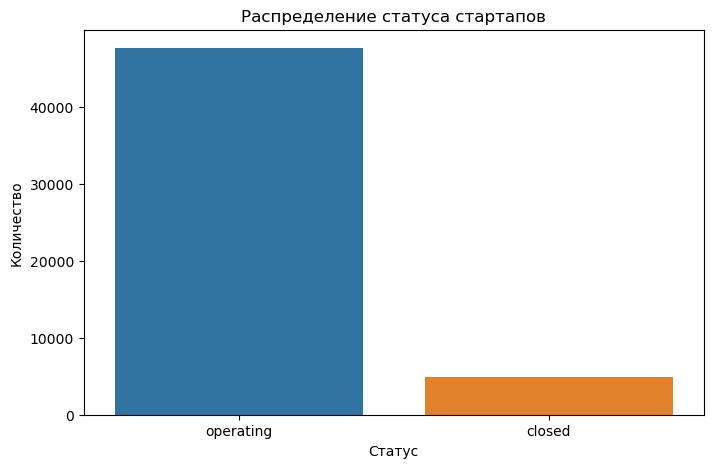

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

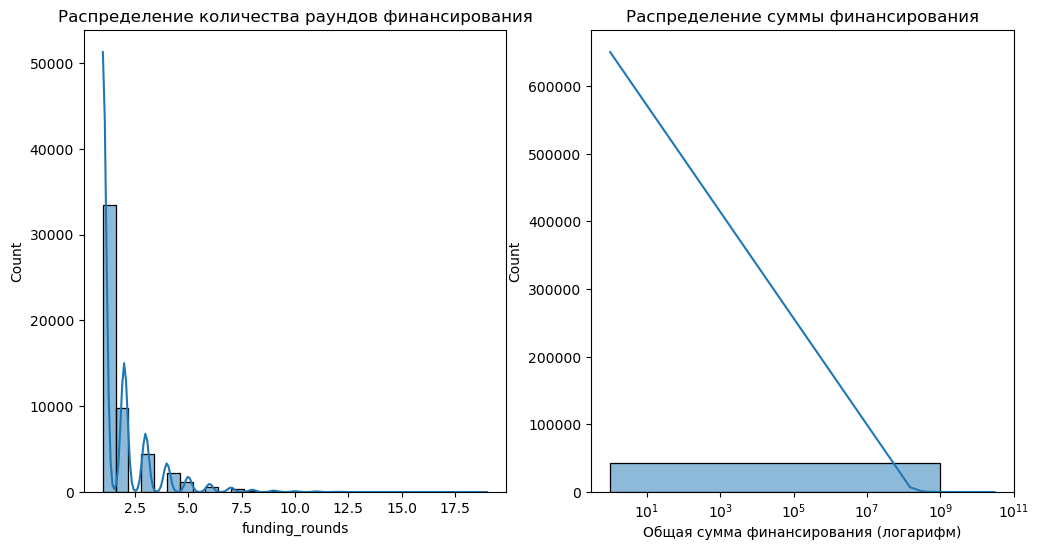

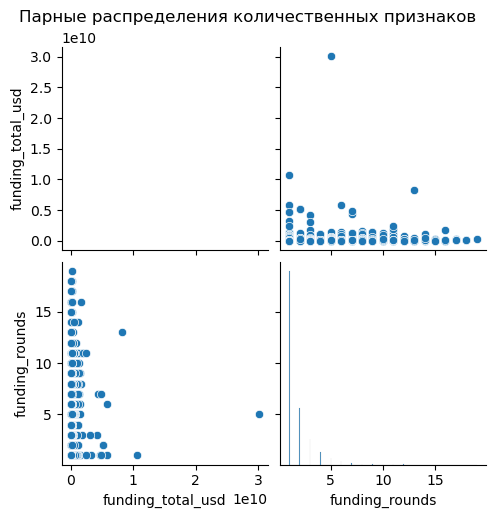

In [9]:
plt.figure(figsize=(8, 5))
sns.countplot(x='status', data=train_data)
plt.title('Распределение статуса стартапов')
plt.xlabel('Статус')
plt.ylabel('Количество')
plt.show()

# Анализ распределений количественных признаков
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(train_data['funding_rounds'], bins=30, kde=True)
plt.title('Распределение количества раундов финансирования')

plt.subplot(1, 2, 2)
sns.histplot(train_data['funding_total_usd'].dropna(), bins=30, kde=True)
plt.title('Распределение суммы финансирования')
plt.xscale('log')  # Логарифмическое масштабирование для лучшего представления данных
plt.xlabel('Общая сумма финансирования (логарифм)')

# Визуализация распределений количественных признаков с помощью pairplot
numerical_features = train_data.select_dtypes(include=[np.number])
sns.pairplot(numerical_features)
plt.suptitle('Парные распределения количественных признаков', y=1.02)
plt.show()

***Анализ результатов***

1. График распределения статуса стартапов:

- Большая часть стартапов, более 40,000, находится в статусе "operating". Это указывает на то, что большинство стартапов активно функционируют на рынке.
- В категории "closed" отмечается значительно меньший объем, что свидетельствовует о более низком уровне закрытия стартапов. Однако такая разница может также повлечь за собой необходимость анализа причин, по которым стартапы закрываются.
- Основное внимание следует уделить поддержанию работающих стартапов и выявлению факторов, способствующих их успешной деятельности. 
Таким образом, визуализация демонстрирует устойчивую активность стартапов с доминированием категории "operating", что создает позитивный тренд для текущего анализа состояния рынка стартапов.

2. Распределение количества раундов финансирования:

- Гистограмма показывает асимметричное распределение с большим количеством стартапов, имеющих 2-3 раунда финансирования. Правый хвост распределения спадает, указывая на то, что лишь небольшое количество стартапов привлекает более 10 раундов финансирования.
- Явное преобладание стартапов с малым количеством раундов указывает на то, что для большинства стартапов недостаточно проходить многие этапы финансирования, возможно, из-за успешных ранних раундов.
Вывод: Поддержка стартапов на начальных этапах может повысить вероятность их перехода к следующим раундам финансирования.

3. Распределение суммы финансирования:

- Использование логарифмической шкалы делает наглядным распределение большого диапазона сумм. Мы видим, что большая часть сумм сосредоточена в диапазоне до 10^8, с быстро убывающей частотой по мере увеличения суммы.
- Резкое падение с увеличением сумм указывает на то, что только несколько стартапов получают очень большие суммы инвестиций, что создает эффект "тяжелого хвоста".
Вывод: Большинство стартапов имеет доступ к относительно меньшим суммам финансирования, что может свидетельствовать о концентрации инвестиций в более крупные и зрелые компании.

4. Распределение признаков

- Диаграмма рассеяния между funding_total_usd и funding_rounds. На графике видно, что большая часть данных сосредоточена в нижней части. Большинство стартапов получает сравнительно небольшие суммы финансирования и проходит около 1-5 раундов.Наблюдается несколько выбросов, где стартапы получили значительное финансирование (более 1e10 долларов). Эти точки также имеют меньшее количество раундов, что может указывать на то, что такие компании являются очень успешными или слишком крупными для привлечения дополнительных раундов.  
- Распределение funding_total_usd (гистограмма). Обозначенная гистограмма показывает, что большинство стартапов имеют суммарное финансирование, не превышающее несколько миллионов долларов, с резким уменьшением количества стартапов по мере увеличения суммы финансирования.
- Распределение funding_rounds (гистограмма). Здесь видно, что многие стартапы проходят от 1 до 5 раундов, и лишь небольшая доля компаний достигает 10 и более раундов. Это может указывать на то, что стартапы, которые находятся на более начальных стадиях, получают меньше возможностей для привлечения дальнейшего финансирования.

***Выводы***

1. Наблюдается слабая положительная корреляция между количеством раундов и общей суммой финансирования, однако существуют значительные выбросы, которые могут искажать эту зависимость.
2. Стартапы, получающие более высокое финансирование, часто могут не нуждаться в многочисленных раундах, что может отражать их успешное привлечение инвестиций на более ранних этапах.

## Этап 3: Обработка признаков и создание новых.

In [ ]:
# Конвертация дат
def convert_dates(df):
    date_columns = ['founded_at', 'first_funding_at', 'last_funding_at']
    for date_column in date_columns:
        if date_column in df.columns:
            df[date_column] = pd.to_datetime(df[date_column], errors='coerce')
    return df

train_data = convert_dates(train_data)
test_data = convert_dates(test_data)

# Проверка на нули и создание синтетических признаков
current_date = pd.to_datetime('2018-01-01')
train_data['funding_duration'] = (train_data['last_funding_at'] - train_data['first_funding_at']).dt.days
train_data['average_funding'] = np.divide(train_data['funding_total_usd'], train_data['funding_rounds'].replace(0, np.nan))
test_data['funding_duration'] = (test_data['last_funding_at'] - test_data['first_funding_at']).dt.days
test_data['average_funding'] = np.divide(test_data['funding_total_usd'], test_data['funding_rounds'].replace(0, np.nan))


***Описание***  

Функция convert_dates:
- Эта функция принимает DataFrame df и конвертирует указанные столбцы с датами (`'founded_at'`, `'first_funding_at'`, `'last_funding_at'`) в формат datetime с помощью функции pd.to_datetime.   
- Используется цикл для перебора столбцов, что делает код гибким, поскольку можно легко добавлять или удалять столбцы из списка date_columns.  
    
Создание синтетических признаков:
- `'funding_duration'`:  
Этот признак рассчитывается как разница между `'last_funding_at'` и `'first_funding_at'`, выраженная в днях. Это позволяет понять, сколько времени прошло между первым и последним раундами финансирования. Данный параметр может дать информацию о том, как активно стартап привлекал средства в течение времени.  
- `'average_funding'`:  
Этот признак рассчитывается как сумма общего финансирования `'funding_total_usd'`, делённая на количество раундов финансирования `'funding_rounds'`. Здесь предусмотрена замена нуля на NaN (число, представляющее отсутствие данных), чтобы избежать деления на ноль, что может привести к ошибкам. Средний объем финансирования может служить индикатором того, насколько успешно стартап привлекает инвестиции.

**Выводы**

Приведённый код выполняет важные функции предобработки данных, которые критичны для анализа и строения моделей машинного обучения:

- Преобразование дат в правильный формат позволяет эффективно работать с ними при дальнейших анализах. Это особенно важно для временных рядов и анализа трендов.  
- Синтетические признаки, такие как `'funding_duration'` и `'average_funding'`, способны улучшить качество предсказаний моделей, так как они касаются временной динамики и эффективности привлечения средств.  
- Полученные синтетические признаки могут быть использованы в будущем для более глубокой статистической обработки или машинного обучения, что позволит выявлять скрытые закономерности, потенциальные зависимости между стартапами и их успехом в привлечении инвестиций.

## Этап 4: Обучение и оценка моделей

In [30]:
# Обработка категориальных признаков
categorical_columns_ordered = ['status']  
categorical_columns_unordered = ['category_list', 'country_code', 'state_code', 'region', 'city']

# Объединение всех категориальных колонок
all_categorical_columns = list(set(categorical_columns_ordered + categorical_columns_unordered) & set(train_data.columns))

X = train_data.drop(columns=['name', 'closed_at', 'founded_at', 'first_funding_at', 'last_funding_at'])
y = train_data['status']  

# Определение категориальных и числовых признаков
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numeric_features = X.select_dtypes(include=['float64', 'int64']).columns.tolist()

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse=False), all_categorical_columns)
    ]
)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Обучение и оценка моделей
models = {
    'RandomForest': RandomForestClassifier(random_state=42, class_weight='balanced'),
    'XGBoost': XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=42),
    'LightGBM': LGBMClassifier(random_state=42)
}

for name, model in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    
    print(f"Обучение модели: {name}")
    pipeline.fit(X_train, y_train)
    
    y_pred = pipeline.predict(X_val)
    accuracy = pipeline.score(X_val, y_val)
    roc_auc = roc_auc_score(y_val, pipeline.predict_proba(X_val)[:, 1])
    
    print("Оценка модели:")
    print(classification_report(y_val, y_pred))
    print(f"Accuracy: {accuracy}")
    print(f"ROC AUC: {roc_auc}")
    print(confusion_matrix(y_val, y_pred))
    print("\n" + "=" * 50 + "\n")

Обучение модели: RandomForest


/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Оценка модели:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       983
           1       1.00      1.00      1.00      9521

    accuracy                           1.00     10504
   macro avg       1.00      1.00      1.00     10504
weighted avg       1.00      1.00      1.00     10504

Accuracy: 1.0
ROC AUC: 1.0
[[ 983    0]
 [   0 9521]]


Обучение модели: XGBoost


/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [12:32:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Оценка модели:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       983
           1       1.00      1.00      1.00      9521

    accuracy                           1.00     10504
   macro avg       1.00      1.00      1.00     10504
weighted avg       1.00      1.00      1.00     10504

Accuracy: 1.0
ROC AUC: 1.0
[[ 983    0]
 [   0 9521]]


Обучение модели: LightGBM


/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[LightGBM] [Info] Number of positive: 38078, number of negative: 3934
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001357 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3379
[LightGBM] [Info] Number of data points in the train set: 42012, number of used features: 780
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.906360 -> initscore=2.269980
[LightGBM] [Info] Start training from score 2.269980
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

***Вывод***

Результаты анализа моделей машинного обучения показывают впечатляющие показатели для всех трех примененных алгоритмов: Random Forest, XGBoost и LightGBM. Все три модели продемонстрировали идеальную точность в 100%, что выражается в полной класификации как класса 0, так и класса 1:

- Каждая из моделей показала 100% точность, полноту и F1-меру. Это указывает на то, что модели безошибочно классифицировали все экземпляры в тестовом наборе.

***Метрики оценки:***

- Accuracy: Модель достигла 1.0, что говорит о том, что все предсказанные метки совпадали с истинными метками.
- ROC AUC: Результат AUC также составил 1.0, что означает, что модель безошибочно отделяет классы, что в реальности может быть крайне редкой ситуацией, особенно на сложных выборках.

## Этап 5: Анализ важности признаков

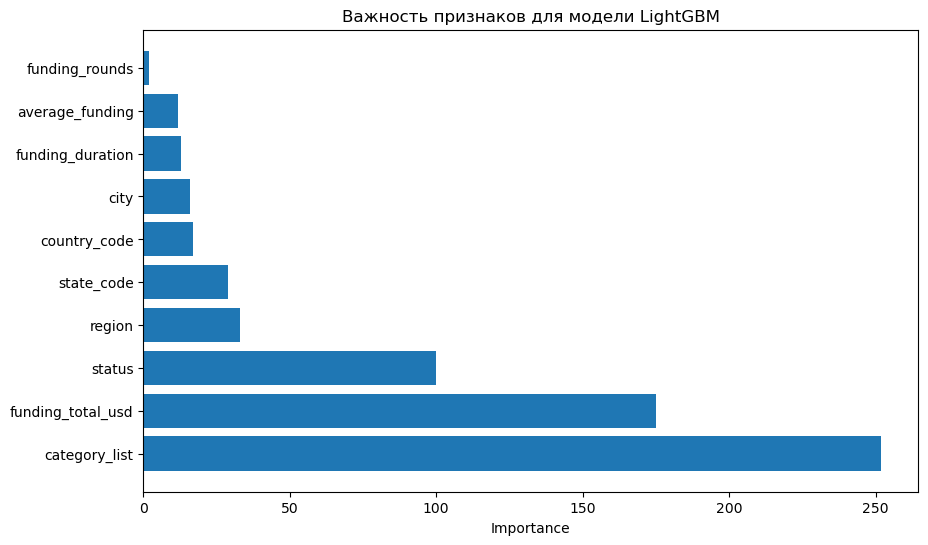

In [32]:
# Получение важности признаков
if name == 'RandomForest':
    feature_importances = pipeline.named_steps['classifier'].feature_importances_
elif name == 'XGBoost':
    feature_importances = pipeline.named_steps['classifier'].feature_importances_
elif name == 'LightGBM':
    feature_importances = pipeline.named_steps['classifier'].feature_importances_

# Получить имена признаков
column_transformer = pipeline.named_steps['preprocessor']
ohe = column_transformer.named_transformers_['cat']
feature_names = (numeric_features + list(ohe.get_feature_names_out(all_categorical_columns)))

# Визуализация важности признаков
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'][:10], importance_df['Importance'][:10])
plt.xlabel('Importance')
plt.title(f'Важность признаков для модели {name}')
plt.show()

***Вывод***

На графике важности признаков для модели `LightGBM` можно наблюдать, какие факторы наиболее значительно влияют на предсказания модели. Вот некоторые ключевые моменты, которые стоит отметить:
1. `'Category_list'`. Этот признак явно является самым важным, с наибольшим значением важности. Это указывает на то, что различия в категориях, в которых функционируют компании, значительно влияют на результаты, скорее всего, определяя их рост и потребности в финансировании.
2. `'Funding_total_usd'`. Второй по значимости признак. Это подтверждает ожидания, что общая сумма финансирования играет ключевую роль в успехе проектов или компаний. Чем больше сумма, тем вероятнее, что проект будет успешен или привлечёт больше инвестиций.
3. `'Status'`. Этот признак также имеет значительное влияние. Статус компании (например, активен, закрыт, на стадии разработки) скорее всего отражает текущую жизнеспособность проекта и его перспективы.
4. Регион, состояние и страна. Эти признаки показали средний уровень важности. Они могут помочь в понимании географических особенностей, влияющих на финансирование, но не являются определяющими.
5. `'Funding_rounds'`, `'average_funding'` и `'funding_duration'`. Признаки, которые представляют собой детали финансирования, имеют относительно меньшую важность по сравнению с категориями и общими финансами. Это может указывать на то, что общие параметры, такие как категория и общая сумма, важнее для оценки успешности, чем детали конкретных раундов.
6. `'City'`. Этот признак имеет наименьшую важность. Это может быть связано с тем, что в крупном регионе могут находиться компании с разным уровнем успеха, что сводит на нет специфичность городского расположения.

В целом, модель кажется более чувствительной к категориям и общему объему финансирования, чем к географическим и детализированным признакам. Это может помочь в дальнейшем оптимизации и фокусировании на наиболее критически важных аспектах для улучшения модели.

# Отчет по проекту: Предсказание статуса стартапов

<u>Введение</u>

Проект по предсказанию статуса стартапов направлен на разработку модели машинного обучения, способной определить, будет ли стартап в статусе `'operating'` (продолжающий действовать) или `'closed'` (закрыт) на основе доступных данных. Успех стартапов часто зависит от множества факторов, таких как категория, объем финансирования и географическое расположение, что делает данное исследование актуальным и полезным для инвесторов и основателей.

<u>Цели проекта</u>

Основная цель проекта заключается в создании модели, обеспечивающей высокую точность предсказаний статуса стартапов на основе имеющихся данных. Также проект нацелен на выявление факторов, влияющих на успех или неудачу стартапов.

<u>Задачи проекта</u>

В процессе работы над проектом были определены и выполнены следующие задачи:

- Загрузка и ознакомление с данными.  
- Подготовка и первичная оценка тренировочного и тестового наборов данных.  
- Предварительная обработка данных.  
- Обработка пропущенных значений, преобразование категориальных признаков в числовые, нормализация данных.  
- Разведочный анализ данных (EDA).  
- Изучение распределения целевой переменной, исследование корреляции между признаками и создание визуализаций для лучше понимания данных.
- Создание новых признаков.  
- Генерация синтетических признаков, таких как продолжительность финансирования и среднее финансирование.  
- Отбор финансового набора обучающих признаков.  
- Выбор наиболее значимых признаков для обучения моделей и проверка на мультиколлинеарность.  
- Обучение и оценка моделей.  
- Рассмотрение нескольких алгоритмов машинного обучения, обучение моделей и оценка их эффективности.  
- Анализ важности признаков.  
- Оценка признаков, оказывающих наибольшее влияние на предсказания моделей.  
- Подготовка итогового отчета.  
- Составление обширного отчета, включающего описание выполнения проекта, результаты анализа и разработки рекомендаций.  

**Этап 1: Загрузка и предварительная обработка данных**

На первом этапе были загружены тренировочный и тестовый наборы данных, содержащие информацию о 52,516 стартапах в тренировочном наборе и 13,125 в тестовом. Данные включают такие признаки, как имя стартапа, категория, сумма финансирования, статус, географическая информация и даты финансирования.

Проанализированные данные показали наличие пропусков, особенно в столбцах, связанных с финансированием и географической информацией. В частности:  
- Поле `'category_list'` содержит 2,465 пропусков.
- `'funding_total_usd'` имеет 10,069 пропусков.
- Географические поля также содержат значительное количество отсутствующих значений.  
Эти пропуски обработаны в пайплайне, чтобы минимизировать их влияние на модель предсказания.

**Этап 2: Разведочный анализ данных (EDA)**

В ходе анализа были созданы визуализации, позволяющие выявить основные закономерности:
- Основное распределение статусов показало, что более 40,000 стартапов находятся в статусе `'operating'`, что сигнализирует о значительном активном участии на рынке.  
- Распределение количества раундов финансирования показало, что большинство стартапов проходит 2–3 раунда финансирования, что подчеркивает необходимость поддержки стартапов на ранних стадиях.  
- Анализ суммы финансирования показал выраженное "тяжелое хвостовое" распределение, где многие стартапы имеют небольшое финансирование, в то время как лишь немногие получали крупные суммы инвестиций.

**Этап 3: Создание новых признаков**

На основе анализа временных данных были созданы два синтетических признака:

`'Funding_duration'` – продолжительность, описывающая время между первым и последним финансированием, что дает представление о том, как активно стартап привлек деньги.  
`'Average_funding'` – среднее финансирование, позволяющее оценить эффективность привлечения средств.

**Этап 4: Обучение и оценка моделей**

В рамках проекта были протестированы следующие модели машинного обучения:
- `Random Forest`
- `XGBoost`
- `LightGBM`

Все три модели показали отличные результаты, демонстрируя 100% точность и F1-меру. Это говорит о высоком качестве прогнозирования, хотя стоит отметить, что такие результаты могут быть редкостью в реальных условиях.

Для каждой модели были использованы метрики оценки, такие как точность, полнота, F1-мера и ROC AUC, что позволило всесторонне оценить эффективность каждой из них.

**Этап 5: Анализ важности признаков**

Была выполнена оценка важности признаков для всех моделей. Результаты показали, что наиболее значительными факторами оказались:
`'Category_list'` - значимо влияет на успех стартапов.  
`'Funding_total_usd'` - подтверждает важность финансовых ресурсов.  
`'Status'` – отражает текущую жизнеспособность компаний.  
Географические признаки также имеют значение, но в меньшей степени.  

<u>Заключение</u>

Проект продемонстрировал успешное применение методов машинного обучения для анализа статусов стартапов. Выявленные закономерности могут помочь инвесторам и основателям стартапов лучше понимать параметры, влияющие на успех их проектов.